# Подготовка данных для работы

In [1]:
# imports
import pandas as pd
import numpy as np
import seaborn as sns
from matplotlib import pyplot as plt
from scipy.stats import chi2_contingency
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.model_selection import train_test_split
from statsmodels.formula.api import logit
from sklearn import metrics
from sklearn.metrics import classification_report
from sklearn.model_selection import cross_val_score

import graphviz
from sklearn.tree import export_graphviz
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestClassifier

import warnings
from statsmodels.tools.sm_exceptions import ConvergenceWarning
warnings.simplefilter('ignore', ConvergenceWarning)
warnings.simplefilter('ignore', RuntimeWarning)

In [4]:
names_list_filepath = '/content/names.txt'
attribute_names = []

with open(names_list_filepath, 'r') as file:
    attribute_names = file.read().splitlines()

data = pd.read_csv('/content/spambase.data', names=attribute_names)
data

,word_freq_make,word_freq_address,word_freq_all,word_freq_3d,word_freq_our,word_freq_over,word_freq_remove,word_freq_internet,word_freq_order,word_freq_mail,...,char_freq_;,char_freq_(,char_freq_[,char_freq_!,char_freq_$,char_freq_#,capital_run_length_average,capital_run_length_longest,capital_run_length_total,Class
0,0.00,0.64,0.64,0.0,0.32,0.00,0.00,0.00,0.00,0.00,...,0.000,0.000,0.0,0.778,0.000,0.000,3.756,61,278,1
1,0.21,0.28,0.50,0.0,0.14,0.28,0.21,0.07,0.00,0.94,...,0.000,0.132,0.0,0.372,0.180,0.048,5.114,101,1028,1
2,0.06,0.00,0.71,0.0,1.23,0.19,0.19,0.12,0.64,0.25,...,0.010,0.143,0.0,0.276,0.184,0.010,9.821,485,2259,1
3,0.00,0.00,0.00,0.0,0.63,0.00,0.31,0.63,0.31,0.63,...,0.000,0.137,0.0,0.137,0.000,0.000,3.537,40,191,1
4,0.00,0.00,0.00,0.0,0.63,0.00,0.31,0.63,0.31,0.63,...,0.000,0.135,0.0,0.135,0.000,0.000,3.537,40,191,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4596,0.31,0.00,0.62,0.0,0.00,0.31,0.00,0.00,0.00,0.00,...,0.000,0.232,0.0,0.000,0.000,0.000,1.142,3,88,0
4597,0.00,0.00,0.00,0.0,0.00,0.00,0.00,0.00,0.00,0.00,...,0.000,0.000,0.0,0.353,0.000,0.000,1.555,4,14,0
4598,0.30,0.00,0.30,0.0,0.00,0.00,0.00,0.00,0.00,0.00,...,0.102,0.718,0.0,0.000,0.000,0.000,1.404,6,118,0
4599,0.96,0.00,0.00,0.0,0.32,0.00,0.00,0.00,0.00,0.00,...,0.000,0.057,0.0,0.000,0.000,0.000,1.147,5,78,0


# Целостность набора данных

Прежде чем анализировать данные, давайте проверим, что атрибут «Класс» содержит только значения 1 и 0. Кроме того, мы проверим наличие значений NaN в наборе данных.

In [ ]:
data['Class'].unique()

array([1, 0])

In [ ]:
count_nan_in_df = data.isnull().sum().sum()
print(f'Number of NaN values: {count_nan_in_df}')

Number of NaN values: 0


Для простоты изменим тип класса на bool и переименуем его в «спам». Следовательно, когда запись имеет spam=True, это означает, что электронное письмо является спамом.

In [ ]:
data['spam'] = data['Class'].astype(bool)
data = data.drop(columns=['Class'])
data['spam']

,spam
0,True
1,True
2,True
3,True
4,True
...,...
4596,False
4597,False
4598,False
4599,False


# Изучение общей информации

In [ ]:
data.keys()

Index(['word_freq_make', 'word_freq_address', 'word_freq_all', 'word_freq_3d',
       'word_freq_our', 'word_freq_over', 'word_freq_remove',
       'word_freq_internet', 'word_freq_order', 'word_freq_mail',
       'word_freq_receive', 'word_freq_will', 'word_freq_people',
       'word_freq_report', 'word_freq_addresses', 'word_freq_free',
       'word_freq_business', 'word_freq_email', 'word_freq_you',
       'word_freq_credit', 'word_freq_your', 'word_freq_font', 'word_freq_000',
       'word_freq_money', 'word_freq_hp', 'word_freq_hpl', 'word_freq_george',
       'word_freq_650', 'word_freq_lab', 'word_freq_labs', 'word_freq_telnet',
       'word_freq_857', 'word_freq_data', 'word_freq_415', 'word_freq_85',
       'word_freq_technology', 'word_freq_1999', 'word_freq_parts',
       'word_freq_pm', 'word_freq_direct', 'word_freq_cs', 'word_freq_meeting',
       'word_freq_original', 'word_freq_project', 'word_freq_re',
       'word_freq_edu', 'word_freq_table', 'word_freq_conference',


In [ ]:
class_counts = data['spam'].value_counts()
print(class_counts)
print("\n")
data.info()

spam
False    2788
True     1813
Name: count, dtype: int64


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4601 entries, 0 to 4600
Data columns (total 58 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   word_freq_make              4601 non-null   float64
 1   word_freq_address           4601 non-null   float64
 2   word_freq_all               4601 non-null   float64
 3   word_freq_3d                4601 non-null   float64
 4   word_freq_our               4601 non-null   float64
 5   word_freq_over              4601 non-null   float64
 6   word_freq_remove            4601 non-null   float64
 7   word_freq_internet          4601 non-null   float64
 8   word_freq_order             4601 non-null   float64
 9   word_freq_mail              4601 non-null   float64
 10  word_freq_receive           4601 non-null   float64
 11  word_freq_will              4601 non-null   float64
 12  word_freq_people            4

*   **Количество случаев**: 4601, из которых 1813 — СПАМ (39,4%)
*   **Количество атрибутов**: 58 (57 непрерывных, 1 категориальный, представляющий метку класса)



Письма можно разделить на две группы: спам и не спам. Чтобы лучше понять эти категории, расчитаем статистику для каждой группы.

In [ ]:
spam = data[data['spam'] == True]
non_spam = data[data['spam'] == False]

In [ ]:
spam.describe()

,word_freq_make,word_freq_address,word_freq_all,word_freq_3d,word_freq_our,word_freq_over,word_freq_remove,word_freq_internet,word_freq_order,word_freq_mail,...,word_freq_conference,char_freq_;,char_freq_(,char_freq_[,char_freq_!,char_freq_$,char_freq_#,capital_run_length_average,capital_run_length_longest,capital_run_length_total
count,1813.000000,1813.000000,1813.000000,1813.000000,1813.000000,1813.000000,1813.000000,1813.000000,1813.000000,1813.000000,...,1813.000000,1813.000000,1813.000000,1813.000000,1813.000000,1813.000000,1813.000000,1813.000000,1813.000000,1813.000000
mean,0.152339,0.164650,0.403795,0.164672,0.513955,0.174876,0.275405,0.208141,0.170061,0.350507,...,0.002101,0.020573,0.108970,0.008199,0.513713,0.174478,0.078877,9.519165,104.393271,470.619415
std,0.310645,0.348919,0.480725,2.219087,0.707195,0.321927,0.572110,0.544864,0.354804,0.631384,...,0.026821,0.091621,0.282141,0.047449,0.744183,0.360479,0.611941,49.846186,299.284969,825.081179
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,2.000000
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.094000,0.000000,0.000000,2.324000,15.000000,93.000000
50%,0.000000,0.000000,0.300000,0.000000,0.290000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.065000,0.000000,0.331000,0.080000,0.000000,3.621000,38.000000,194.000000
75%,0.170000,0.210000,0.640000,0.000000,0.780000,0.240000,0.340000,0.190000,0.190000,0.510000,...,0.000000,0.000000,0.144000,0.000000,0.645000,0.211000,0.018000,5.708000,84.000000,530.000000
max,4.540000,4.760000,3.700000,42.810000,7.690000,2.540000,7.270000,11.110000,3.330000,7.550000,...,0.770000,1.117000,9.752000,1.171000,7.843000,6.003000,19.829000,1102.500000,9989.000000,15841.000000


In [ ]:
non_spam.describe()

,word_freq_make,word_freq_address,word_freq_all,word_freq_3d,word_freq_our,word_freq_over,word_freq_remove,word_freq_internet,word_freq_order,word_freq_mail,...,word_freq_conference,char_freq_;,char_freq_(,char_freq_[,char_freq_!,char_freq_$,char_freq_#,capital_run_length_average,capital_run_length_longest,capital_run_length_total
count,2788.000000,2788.000000,2788.000000,2788.000000,2788.000000,2788.000000,2788.000000,2788.000000,2788.000000,2788.000000,...,2788.000000,2788.000000,2788.000000,2788.000000,2788.000000,2788.000000,2788.000000,2788.000000,2788.000000,2788.000000
mean,0.073479,0.244466,0.200581,0.000886,0.181040,0.044544,0.009383,0.038415,0.038049,0.167170,...,0.051227,0.050281,0.158578,0.022684,0.109984,0.011648,0.021713,2.377301,18.214491,161.470947
std,0.297838,1.633223,0.502959,0.021334,0.614521,0.222888,0.110467,0.247238,0.198517,0.643197,...,0.365153,0.303372,0.260604,0.134927,0.820859,0.069647,0.243912,5.113685,39.084792,355.738403
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.384000,4.000000,18.750000
50%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.064500,0.000000,0.000000,0.000000,0.000000,1.857000,10.000000,54.000000
75%,0.000000,0.000000,0.120000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.222000,0.000000,0.027000,0.000000,0.000000,2.555000,18.000000,141.000000
max,4.340000,14.280000,5.100000,0.870000,10.000000,5.880000,3.070000,5.880000,5.260000,18.180000,...,10.000000,4.385000,5.277000,4.081000,32.478000,2.038000,7.407000,251.000000,1488.000000,5902.000000


# Гистограммы распределения

In [ ]:
def plot_histogram(feature, spam, non_spam):
    plt.hist(spam[feature], bins=20, alpha=0.5, label='Spam')
    plt.hist(non_spam[feature], bins=20, alpha=0.5, label='Non-Spam')
    plt.xlabel(feature)
    plt.ylabel('Frequency')
    plt.title(f'Histogram of {feature} for Spam and Non-Spam Emails')
    plt.legend()
    plt.show()

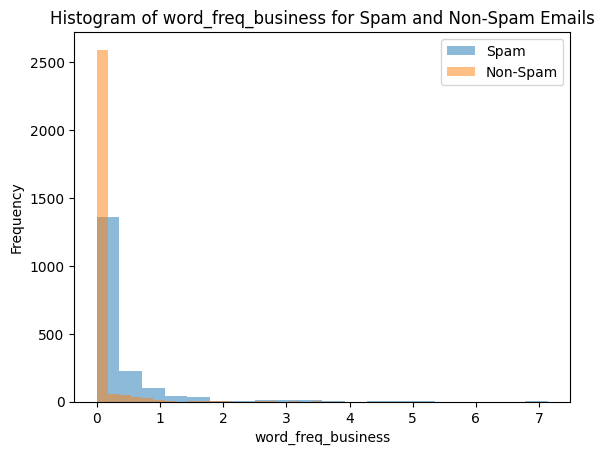

In [ ]:
plot_histogram('word_freq_business', spam, non_spam)

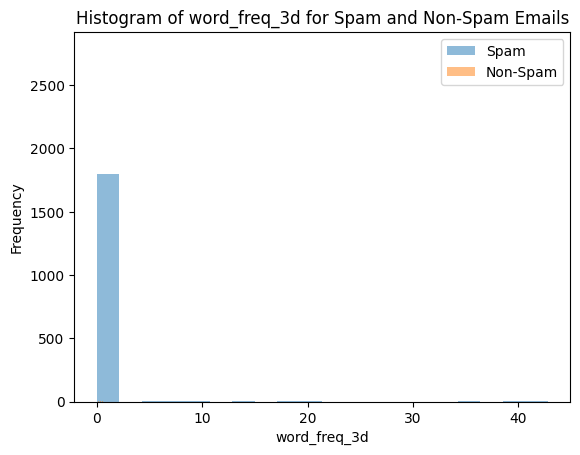

In [ ]:
plot_histogram('word_freq_3d', spam, non_spam)

При сравнении word_freq_businessс word_freq_3d становится ясно, что последний является хорошей функцией для различения спама и не спама.

# Анализ выбросов

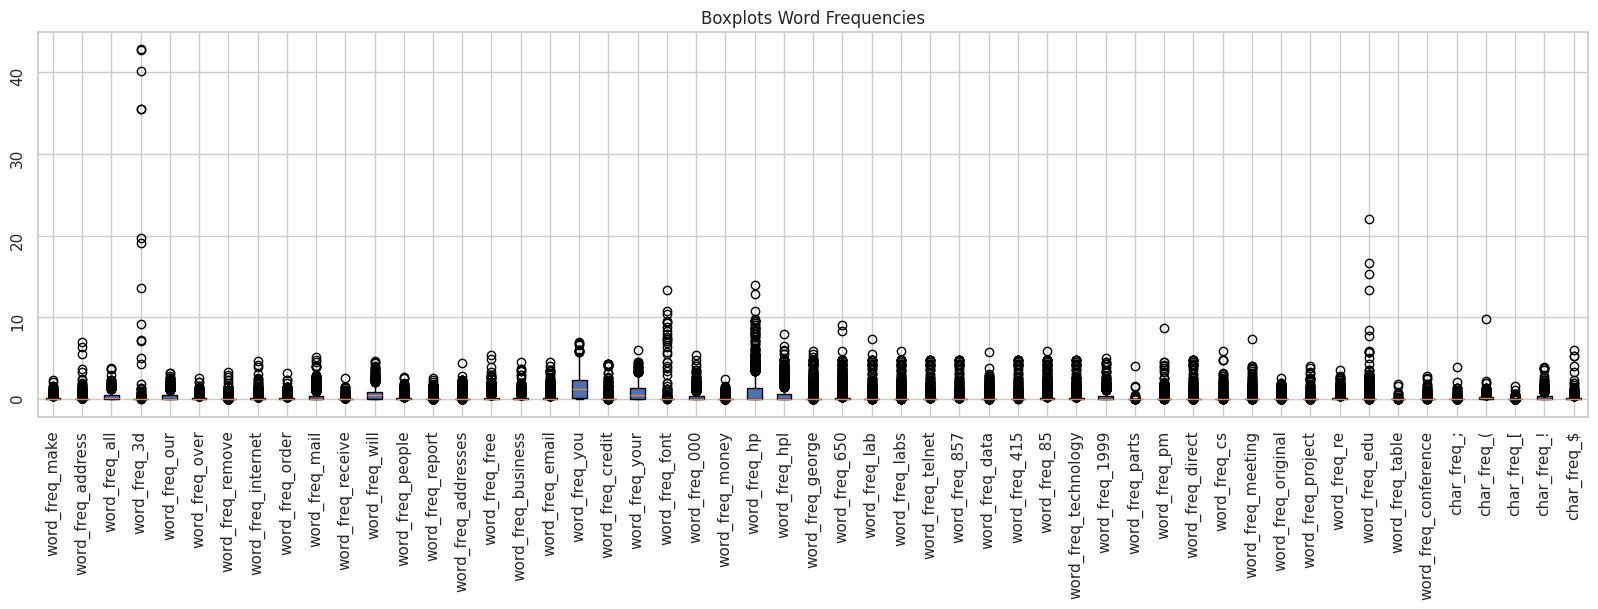

In [ ]:
data_wr_fr = data.iloc[:, :-10]
data_char_freq = data.iloc[:, -10:-4]
data_capital_run = data.iloc[:, -4:-1]
def draw_boxplot(ax, label, data):
    ax.boxplot(data,
               vert=True,
               patch_artist=True,
               labels=data.columns)
    ax.set_title(label)
    ax.yaxis.grid(True)
    ax.tick_params(labelrotation=90)

fig, ax = plt.subplots(figsize=(20, 5))
draw_boxplot(ax, 'Boxplots Word Frequencies', data_wr_fr)
plt.show()


# Исследовательский анализ данных
**Гипотеза 1: Слова, связанные с коммерческими предложениями, чаще встречаются в спам-письмах.**

Усредним значения частот слов и построим их графики.

In [ ]:
mean_wf = data.groupby('spam').mean()
mean_wr_fr = mean_wf.iloc[:, 0:-9]
nospam_wr_fr = mean_wr_fr.iloc[0]
spam_wr_fr = mean_wr_fr.iloc[1]

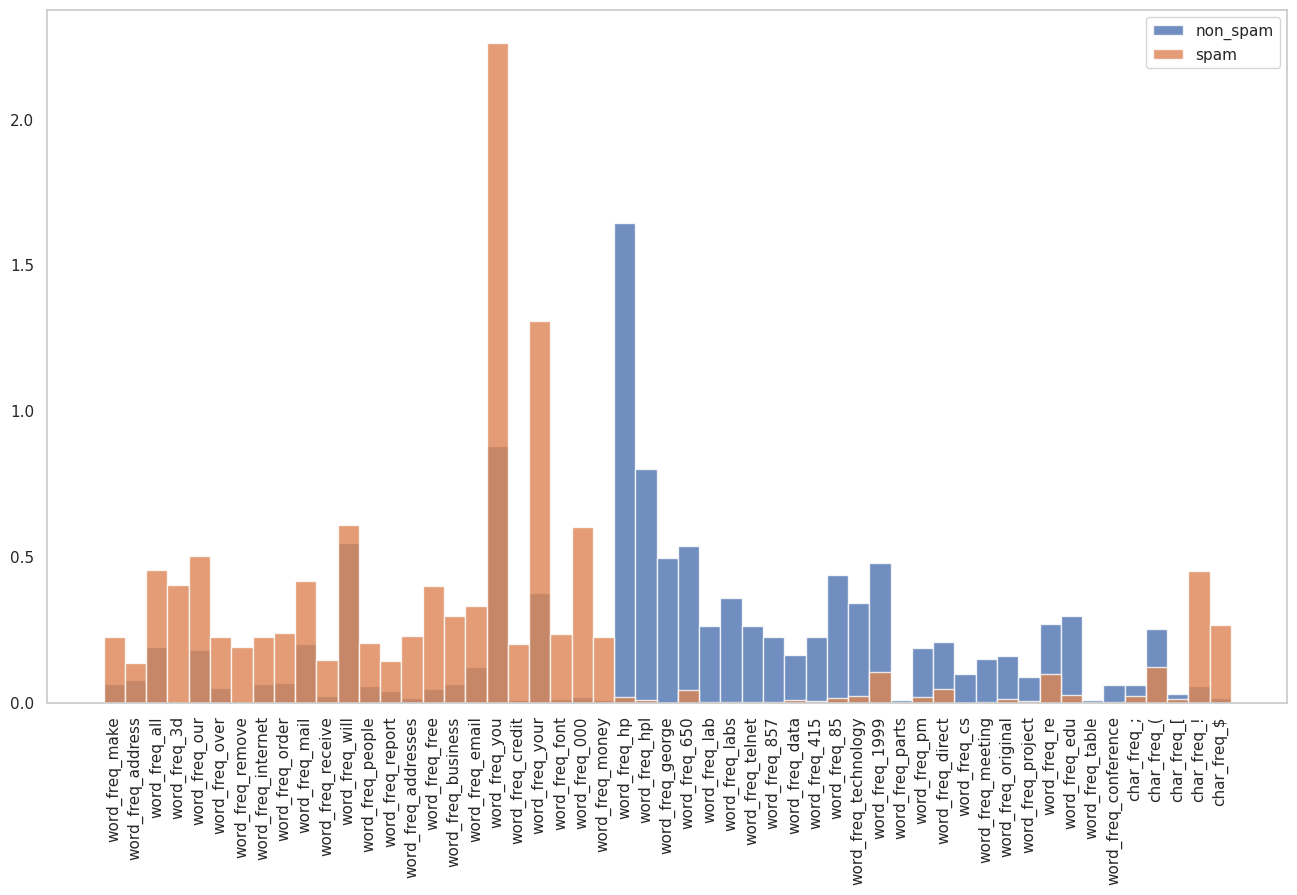

In [ ]:
plt.figure(figsize=(16, 9))
plt.bar(nospam_wr_fr.index, nospam_wr_fr.values, width=1, alpha=0.8)
plt.bar(spam_wr_fr.index, spam_wr_fr.values, width=1, alpha=0.8)
plt.xticks(rotation='vertical')
plt.legend(['non_spam', 'spam'])
plt.grid()
plt.show()

Слова, такие как "free", "win", "money", "order", демонстрируют более высокую среднюю частоту в СПАМ-сообщениях , в то время как другие, такие как "hp", "address", "font" и "george", более распространены в не-спам-сообщениях . Это говорит о том, что слова связанные с коммерческими предложениями чаще встречаются в спам-письмах.

**Гипотеза  2: Длина письма: Спам-письма имеют тенденцию быть короче, чем не спам.**

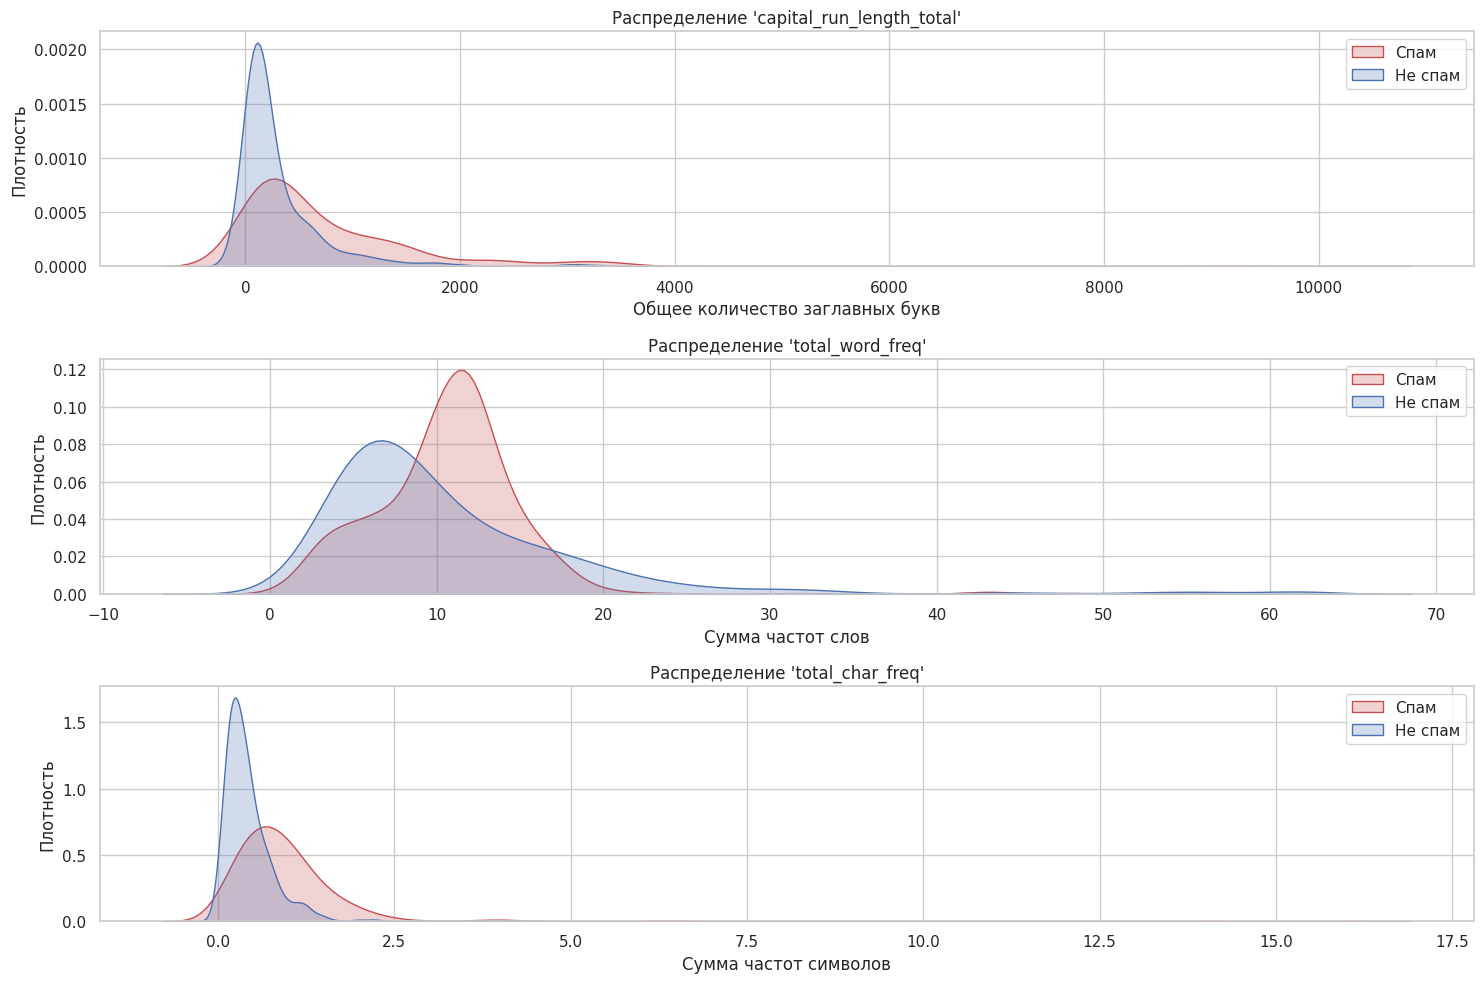

In [ ]:
from scipy.stats import ttest_ind, mannwhitneyu, shapiro
# Создание дополнительной метрики длины письма
# Сумма частот слов и символов как показатель длины
data['total_word_freq'] = data[[col for col in data.columns if col.startswith("word_freq_")]].sum(axis=1)
data['total_char_freq'] = data[[col for col in data.columns if col.startswith("char_freq_")]].sum(axis=1)

# Разделение данных на спам и не спам
spam = data[data['spam'] == 1]
non_spam = data[data['spam'] == 0]

# Выбор метрик для анализа длины письма
spam_lengths = spam['capital_run_length_total']
non_spam_lengths = non_spam['capital_run_length_total']

spam_total_word_freq = spam['total_word_freq']
non_spam_total_word_freq = non_spam['total_word_freq']

spam_total_char_freq = spam['total_char_freq']
non_spam_total_char_freq = non_spam['total_char_freq']


# Визуализация распределения
plt.figure(figsize=(15, 10))

# 'capital_run_length_total'
plt.subplot(3, 1, 1)
sns.kdeplot(spam_lengths, label="Спам", fill=True, color='r')
sns.kdeplot(non_spam_lengths, label="Не спам", fill=True, color='b')
plt.title("Распределение 'capital_run_length_total'")
plt.xlabel("Общее количество заглавных букв")
plt.ylabel("Плотность")
plt.legend()

# 'total_word_freq'
plt.subplot(3, 1, 2)
sns.kdeplot(spam_total_word_freq, label="Спам", fill=True, color='r')
sns.kdeplot(non_spam_total_word_freq, label="Не спам", fill=True, color='b')
plt.title("Распределение 'total_word_freq'")
plt.xlabel("Сумма частот слов")
plt.ylabel("Плотность")
plt.legend()

# 'total_char_freq'
plt.subplot(3, 1, 3)
sns.kdeplot(spam_total_char_freq, label="Спам", fill=True, color='r')
sns.kdeplot(non_spam_total_char_freq, label="Не спам", fill=True, color='b')
plt.title("Распределение 'total_char_freq'")
plt.xlabel("Сумма частот символов")
plt.ylabel("Плотность")
plt.legend()

plt.tight_layout()
plt.show()

Проверим на нормальность распределения

In [ ]:
print("\nПроверка на нормальность распределения для 'capital_run_length_total':")
stat_spam, p_spam = shapiro(spam_lengths)
stat_non_spam, p_non_spam = shapiro(non_spam_lengths)
print(f"Спам: p-value = {p_spam}")
print(f"Не спам: p-value = {p_non_spam}")


Проверка на нормальность распределения для 'capital_run_length_total':
Спам: p-value = 7.577383125428139e-37
Не спам: p-value = 2.2757155672919478e-42


Данные не нормально распределены, выполним тест Манна-Уитни:

In [ ]:
stat, p_value = mannwhitneyu(spam_lengths, non_spam_lengths)

In [ ]:
# Результаты теста
print(f"\nРезультаты статистического теста для 'capital_run_length_total': stat = {stat}, p-value = {p_value}")
if p_value < 0.05:
    print("Отвергаем гипотезу: длина писем статистически значимо различается.")
else:
    print("Не удалось отвергнуть гипотезу: различия в длине писем не статистически значимы.")


Результаты статистического теста для 'capital_run_length_total': stat = 511928.0, p-value = 1.1870783606124169e-54
Отвергаем гипотезу: длина писем статистически значимо различается.


**Гипотеза  3: Пунктуация: Спам-письма чаще используют специальные символы, такие как !, %, $.**

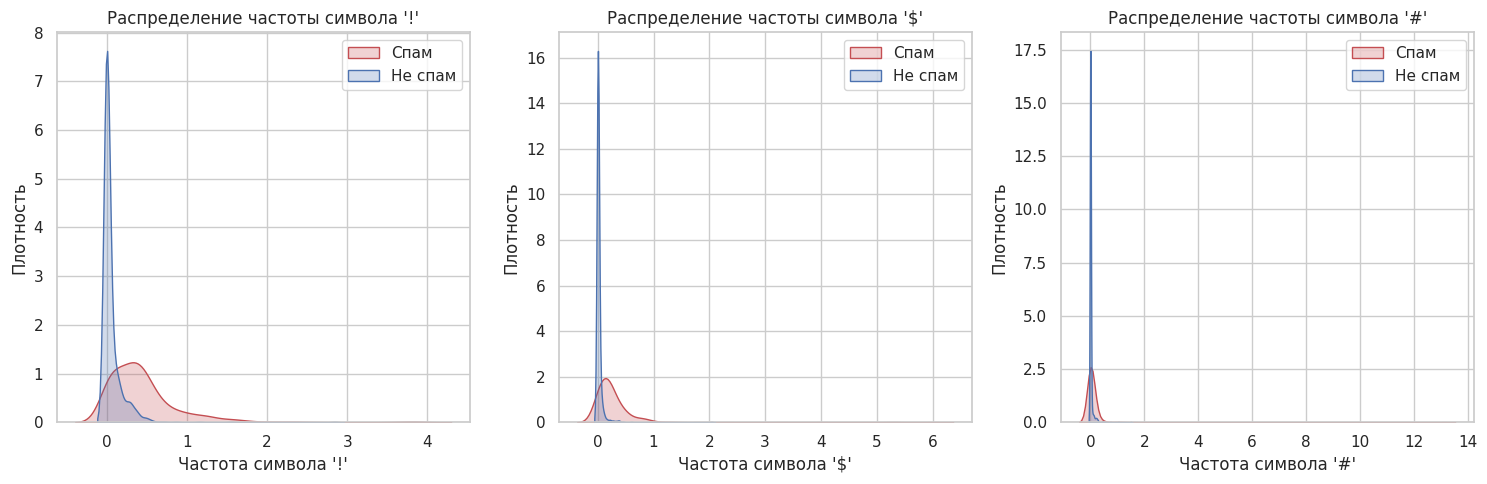

In [ ]:
# Выбор атрибутов, связанных с пунктуацией
spam_punctuation = spam[['char_freq_!', 'char_freq_$', 'char_freq_#']]
non_spam_punctuation = non_spam[['char_freq_!', 'char_freq_$', 'char_freq_#']]

# Визуализация распределений для пунктуации
plt.figure(figsize=(15, 5))

# char_freq_!
plt.subplot(1, 3, 1)
sns.kdeplot(spam_punctuation['char_freq_!'], label="Спам", fill=True, color='r')
sns.kdeplot(non_spam_punctuation['char_freq_!'], label="Не спам", fill=True, color='b')
plt.title("Распределение частоты символа '!'")
plt.xlabel("Частота символа '!'")
plt.ylabel("Плотность")
plt.legend()

# char_freq_$
plt.subplot(1, 3, 2)
sns.kdeplot(spam_punctuation['char_freq_$'], label="Спам", fill=True, color='r')
sns.kdeplot(non_spam_punctuation['char_freq_$'], label="Не спам", fill=True, color='b')
plt.title("Распределение частоты символа '$'")
plt.xlabel("Частота символа '$'")
plt.ylabel("Плотность")
plt.legend()

# char_freq_#
plt.subplot(1, 3, 3)
sns.kdeplot(spam_punctuation['char_freq_#'], label="Спам", fill=True, color='r')
sns.kdeplot(non_spam_punctuation['char_freq_#'], label="Не спам", fill=True, color='b')
plt.title("Распределение частоты символа '#'")
plt.xlabel("Частота символа '#'")
plt.ylabel("Плотность")
plt.legend()

plt.tight_layout()
plt.show()


Графики подтверждают гипотезу.

**Гипотеза  4: Соотношение цифр и букв: Спам-письма содержат больший процент чисел.**

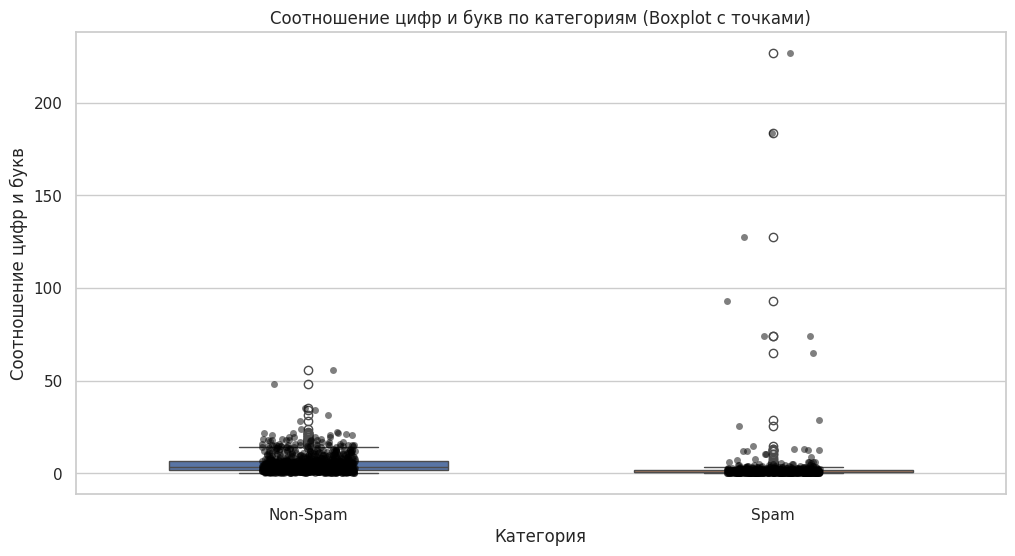

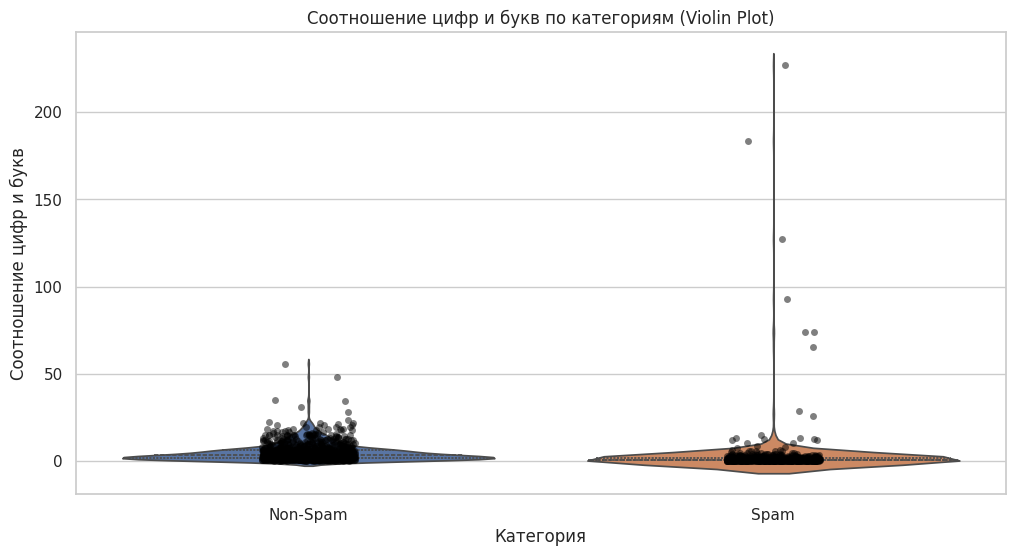

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from scipy import stats

# Преобразование в числовой формат для столбцов, содержащих частоты символов и цифр
char_columns = ['char_freq_;', 'char_freq_(', 'char_freq_[', 'char_freq_!', 'char_freq_$', 'char_freq_#']
# Столбцы с цифрами (например, содержащие 000, 1999, 415 и т.д.)
digit_columns = [col for col in data.columns if any(digit in col for digit in '0123456789')]

# Суммирование частот символов
data['letter_freq'] = data[char_columns].sum(axis=1)

# Суммирование частот цифр
data['digit_freq'] = data[digit_columns].sum(axis=1)

# Рассчитываем соотношение цифр и букв
data['ratio_digits_letters'] = data['digit_freq'] / data['letter_freq']

# Разделение на спам и не спам
spam_data = data[data['spam'] == 1]
non_spam_data = data[data['spam'] == 0]

# Сравнение средних значений соотношения цифр и букв
spam_mean = spam_data['ratio_digits_letters'].mean()
non_spam_mean = non_spam_data['ratio_digits_letters'].mean()


plt.figure(figsize=(12, 6))
sns.boxplot(x='spam', y='ratio_digits_letters', data=data, width=0.6, hue='spam', dodge=False)
sns.stripplot(x='spam', y='ratio_digits_letters', data=data, color='black', alpha=0.5, jitter=True, dodge=False)
plt.title('Соотношение цифр и букв по категориям (Boxplot с точками)')
plt.xlabel('Категория')
plt.ylabel('Соотношение цифр и букв')
plt.xticks([0, 1], ['Non-Spam', 'Spam'])
plt.legend([], [], frameon=False)  # Убираем лишнюю легенду
plt.show()


plt.figure(figsize=(12, 6))
sns.violinplot(x='spam', y='ratio_digits_letters', data=data, inner="quartile", hue='spam', dodge=False)
sns.stripplot(x='spam', y='ratio_digits_letters', data=data, color='black', alpha=0.5, jitter=True, dodge=False)
plt.title('Соотношение цифр и букв по категориям (Violin Plot)')
plt.xlabel('Категория')
plt.ylabel('Соотношение цифр и букв')
plt.xticks([0, 1], ['Non-Spam', 'Spam'])
plt.legend([], [], frameon=False)  # Убираем лишнюю легенду
plt.show()



In [ ]:
# Фильтруем данные, убирая строки с нулевой частотой букв или цифр
data = data[(data['letter_freq'] != 0) & (data['digit_freq'] != 0)]
data['ratio_digits_letters'] = data['digit_freq'] / data['letter_freq'].replace(0, 1)

# Расчитываем средние значения для спама и не спама
spam_mean = data[data['spam'] == 1]['ratio_digits_letters'].mean()
non_spam_mean = data[data['spam'] == 0]['ratio_digits_letters'].mean()

print(f"Среднее для спама: {spam_mean}, Среднее для не спама: {non_spam_mean}")

# Очищаем данные от NaN и Inf значений
data = data[~data['ratio_digits_letters'].isna()]  # Убираем NaN
data = data[~data['ratio_digits_letters'].isin([float('inf'), -float('inf')])]  # Убираем inf

# Отделяем данные для спама и не спама
spam_data = data[data['spam'] == 1]
non_spam_data = data[data['spam'] == 0]

# Проверяем, что в каждой группе есть достаточно данных
if len(spam_data) > 0 and len(non_spam_data) > 0:
    # Выполняем тест Манна-Уитни
    from scipy.stats import mannwhitneyu

    stat, p_value = mannwhitneyu(spam_data['ratio_digits_letters'], non_spam_data['ratio_digits_letters'])
    print(f"U-statistic: {stat}, P-value: {p_value}")
else:
    print("Одна из групп пуста, тест не может быть выполнен.")


Среднее для спама: 2.4977826210295535, Среднее для не спама: 5.127055079170681
U-statistic: 125889.5, P-value: 9.351208971514821e-116


В спам-письмах, в среднем, меньше цифр относительно букв по сравнению с не спам-письмами.P-значение очень маленькое (меньше 0.05), что указывает на то, что разница между группами статистически значима. **Гипотеза неверна**.

**Гипотеза  5: Заглавные буквы: Спам-письма чаще используют заглавные буквы для привлечения внимания.**

Средняя длина последовательности заглавных букв для спама: 7.678766216216217
Средняя длина последовательности заглавных букв для не спама: 2.902649323621228
Максимальная длина последовательности заглавных букв для спама: 152.82162162162163
Максимальная длина последовательности заглавных букв для не спама: 29.758584807492195
Общая длина всех последовательностей заглавных букв для спама: 774.6054054054053
Общая длина всех последовательностей заглавных букв для не спама: 326.4620187304891


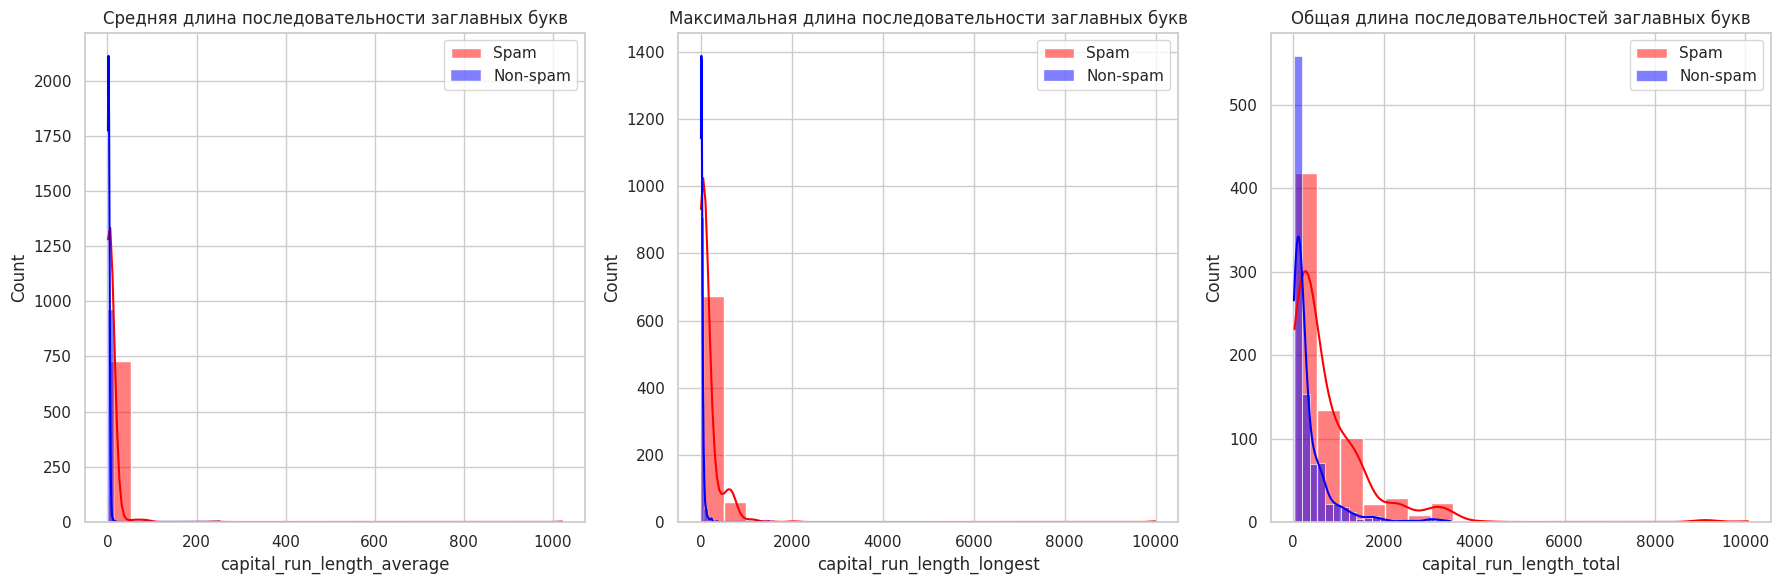

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import mannwhitneyu

# 1. Загрузка данных (если еще не загружено)
# data = pd.read_csv('spambase.csv')

# 2. Рассчитываем среднее для спама и не спама для каждого признака
spam_capital_avg = data[data['spam'] == 1]['capital_run_length_average'].mean()
non_spam_capital_avg = data[data['spam'] == 0]['capital_run_length_average'].mean()

spam_capital_longest = data[data['spam'] == 1]['capital_run_length_longest'].mean()
non_spam_capital_longest = data[data['spam'] == 0]['capital_run_length_longest'].mean()

spam_capital_total = data[data['spam'] == 1]['capital_run_length_total'].mean()
non_spam_capital_total = data[data['spam'] == 0]['capital_run_length_total'].mean()

print(f"Средняя длина последовательности заглавных букв для спама: {spam_capital_avg}")
print(f"Средняя длина последовательности заглавных букв для не спама: {non_spam_capital_avg}")
print(f"Максимальная длина последовательности заглавных букв для спама: {spam_capital_longest}")
print(f"Максимальная длина последовательности заглавных букв для не спама: {non_spam_capital_longest}")
print(f"Общая длина всех последовательностей заглавных букв для спама: {spam_capital_total}")
print(f"Общая длина всех последовательностей заглавных букв для не спама: {non_spam_capital_total}")


# 5. Визуализация данных
# Устанавливаем стиль графиков
sns.set(style="whitegrid")

# Гистограммы для каждого признака
fig, axes = plt.subplots(1, 3, figsize=(18, 6))

# Гистограмма для 'capital_run_length_average'
sns.histplot(spam_data['capital_run_length_average'], color='red', kde=True, label="Spam", ax=axes[0], bins=20)
sns.histplot(non_spam_data['capital_run_length_average'], color='blue', kde=True, label="Non-spam", ax=axes[0], bins=20)
axes[0].set_title('Средняя длина последовательности заглавных букв')
axes[0].legend()

# Гистограмма для 'capital_run_length_longest'
sns.histplot(spam_data['capital_run_length_longest'], color='red', kde=True, label="Spam", ax=axes[1], bins=20)
sns.histplot(non_spam_data['capital_run_length_longest'], color='blue', kde=True, label="Non-spam", ax=axes[1], bins=20)
axes[1].set_title('Максимальная длина последовательности заглавных букв')
axes[1].legend()

# Гистограмма для 'capital_run_length_total'
sns.histplot(spam_data['capital_run_length_total'], color='red', kde=True, label="Spam", ax=axes[2], bins=20)
sns.histplot(non_spam_data['capital_run_length_total'], color='blue', kde=True, label="Non-spam", ax=axes[2], bins=20)
axes[2].set_title('Общая длина последовательностей заглавных букв')
axes[2].legend()

plt.tight_layout()
plt.show()


В целом, все три признака (средняя длина, максимальная длина и общая длина последовательностей заглавных букв) показывают существенные различия между спамом и не спамом. Это подтверждает вашу гипотезу.

# Анализ корреляции


In [ ]:
new_df = data.iloc[:, :-1].copy()

plt.rcParams.update({'figure.figsize':(60,55), 'figure.dpi':100})

correlation_matrix = new_df.corr(method='spearman')
sns.heatmap(correlation_matrix, annot=True, fmt=".2f", vmin=-1, vmax=1, cbar=True, cmap='coolwarm', annot_kws={'size': 15})
plt.show()

Output hidden; open in https://colab.research.google.com to view.

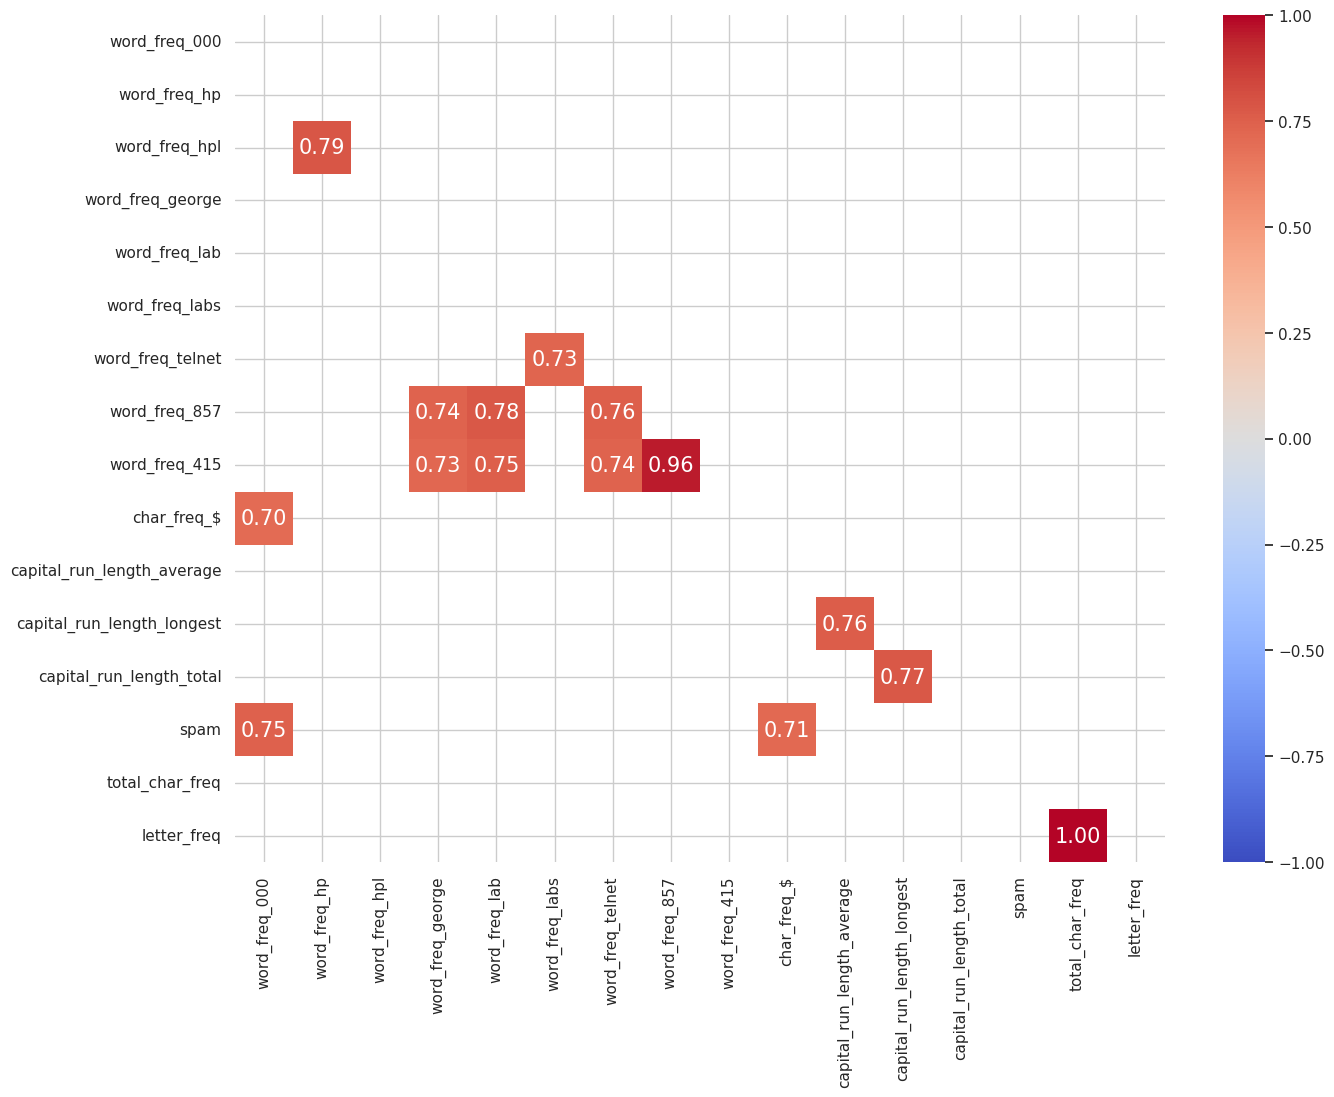

In [ ]:
threshold = 0.7
high_corr = correlation_matrix[abs(correlation_matrix) > threshold]
np.fill_diagonal(high_corr.values, np.nan)
mask = np.triu(np.ones_like(high_corr, dtype=bool))
inverse_mask = ~mask

high_corr_masked = high_corr * inverse_mask
high_corr_masked.dropna(how='all', axis=1, inplace=True)
high_corr_masked.dropna(how='all', axis=0, inplace=True)

mask = np.triu(np.ones_like(high_corr_masked, dtype=bool))

plt.rcParams.update({'figure.figsize':(15,11), 'figure.dpi':100})

sns.heatmap(high_corr_masked, mask=mask, annot=True, fmt=".2f", vmin=-1, vmax=1, cbar=True, cmap='coolwarm', annot_kws={'size': 15})
plt.show()

* **word_freq_415 и char_freq_$**: Очень сильная положительная корреляция (0,96) говорит о том, что эти два признака тесно связаны. Увеличение одного из них, скорее всего, соответствует увеличению другого.
* **word_freq_415 и word_freq_857**: Еще одна сильная положительная корреляция (0,75) говорит о том, что эти признаки также сильно связаны.
* **word_freq_415` и word_freq_telnet**: Сильная корреляция (0,74) указывает на то, что эти признаки, как правило, меняются в одном направлении.
* **word_freq_857 и word_freq_telnet**: Высокая корреляция (0,78) говорит о том, что эти признаки также тесно связаны.
* **capital_run_length_longest и capital_run_length_total**: Сильная корреляция (0,77) указывает на то, что эти признаки имеют тесную линейную связь.
* **spam и total_char_freq**: Сильная корреляция (0,75) означает, что количество символов в сообщении является важным фактором при определении того, является ли оно спамом.
* **word_freq_857` и word_freq_415**: Умеренная корреляция (0,73) говорит о том, что эти признаки изменяются в одном направлении, но с более слабой связью по сравнению с более сильными корреляциями.
* **capital_run_length_average и capital_run_length_total**: Умеренная корреляция (0,76) указывает на то, что эти признаки также показывают линейную зависимость, хотя и не такую сильную, как предыдущие два.
